In [4]:
import pandas as pd #Basic packages for creating dataframes and loading dataset
import numpy as np

import matplotlib.pyplot as plt #Package for visualization

import re #importing package for Regular expression operations

from sklearn.model_selection import train_test_split #Package for splitting the data

from sklearn.preprocessing import LabelEncoder #Package for conversion of categorical to Numerical

from keras.preprocessing.text import Tokenizer #Tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences #Add zeros or crop based on the length
from keras.models import Sequential #Sequential Neural Network
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D #For layers in Neural Network
from keras.utils.np_utils import to_categorical

In [5]:
# Load the dataset as a Pandas DataFrame
dataset = pd.read_csv('/content/sample_data/Sentiment.csv')

# Select only the necessary columns 'text' and 'sentiment'
mask = dataset.columns.isin(['text', 'sentiment'])
data = dataset.loc[:, mask]

# Preprocess the text data
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
data['text'] = data['text'].apply(lambda x: x.replace('rt', ' '))  # Remove 'rt' (Retweets)


<ipython-input-5-3b7761336ca1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: x.lower())
<ipython-input-5-3b7761336ca1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
<ipython-input-5-3b7761336ca1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [6]:
# Define the function to create the LSTM model
def createmodel():
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Tokenization
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

# Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['sentiment'])
y = to_categorical(integer_encoded)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [8]:
# LSTM Model Architecture
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
291/291 - 33s - loss: 0.8253 - accuracy: 0.6465 - val_loss: 0.7528 - val_accuracy: 0.6730 - 33s/epoch - 115ms/step
Epoch 2/10
291/291 - 30s - loss: 0.6818 - accuracy: 0.7117 - val_loss: 0.7303 - val_accuracy: 0.6885 - 30s/epoch - 103ms/step
Epoch 3/10
291/291 - 30s - loss: 0.6166 - accuracy: 0.745

144/144 - 2s - loss: 1.1748 - accuracy: 0.6518 - 2s/epoch - 17ms/step
Test Loss: 1.1747829914093018
Test Accuracy: 0.6518130302429199


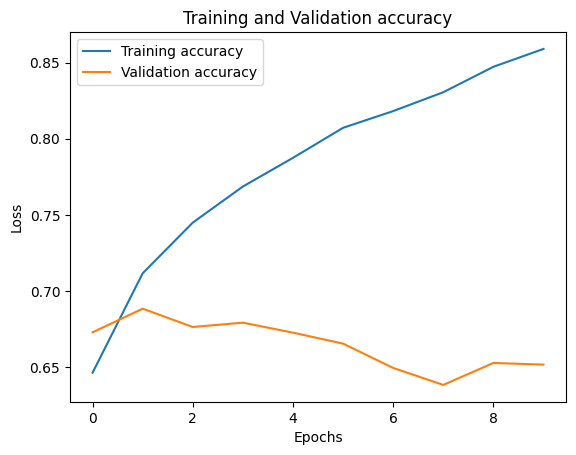

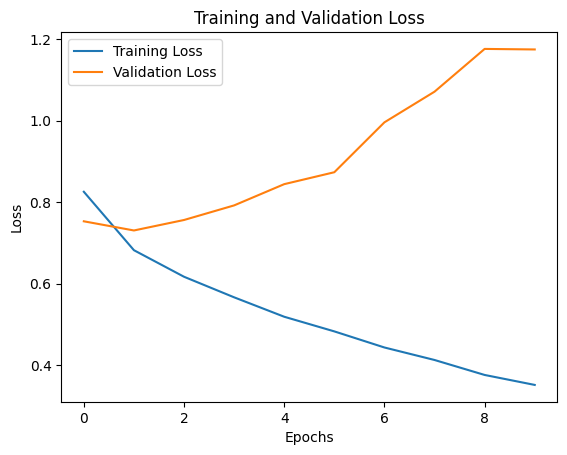

In [9]:
# Evaluate the model on test data
score, accuracy = model.evaluate(X_test, y_test, verbose=2, batch_size=32)
print("Test Loss:", score)
print("Test Accuracy:", accuracy)


# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [10]:
# Save the trained model
model.save('sentimentAnalysis.h5')


In [11]:
from keras.models import load_model

model = load_model('sentimentAnalysis.h5')


In [12]:
# Define the text data to predict sentiment
sentence = ['A lot of good things are happening. We are respected again throughout the world, and that is a great thing. @realDonaldTrump']

# Tokenize and pad the sentence
sentence = tokenizer.texts_to_sequences(sentence)
sentence = pad_sequences(sentence, maxlen=28, dtype='int32', value=0)


In [13]:
# Make predictions using the loaded model
sentiment_probs = model.predict(sentence, batch_size=1, verbose=2)[0]

# Convert sentiment probabilities to sentiment label
sentiment = np.argmax(sentiment_probs)

# Print the sentiment label
if sentiment == 0:
    print("Neutral")
elif sentiment < 0:
    print("Negative")
elif sentiment > 0:
    print("Positive")
else:
    print("Cannot be determined")


1/1 - 0s - 255ms/epoch - 255ms/step
Positive


In [14]:
from keras.wrappers.scikit_learn import KerasClassifier #importing Keras classifier
from sklearn.model_selection import GridSearchCV #importing Grid search CV

In [15]:
# Now you can proceed with the GridSearchCV
model = KerasClassifier(build_fn=createmodel, verbose=2)
batch_size = [10, 20, 40]
epochs = [1, 2]
param_grid = {'batch_size': batch_size, 'epochs': epochs}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)


# Print the best score and best hyperparameters found by GridSearchCV
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-15-487242306e07>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=createmodel, verbose=2)


744/744 - 64s - loss: 0.8284 - accuracy: 0.6458 - 64s/epoch - 86ms/step
186/186 - 2s - loss: 0.7764 - accuracy: 0.6805 - 2s/epoch - 9ms/step
744/744 - 63s - loss: 0.8266 - accuracy: 0.6419 - 63s/epoch - 85ms/step
186/186 - 2s - loss: 0.7681 - accuracy: 0.6751 - 2s/epoch - 8ms/step
744/744 - 63s - loss: 0.8276 - accuracy: 0.6415 - 63s/epoch - 85ms/step
186/186 - 2s - loss: 0.8046 - accuracy: 0.6633 - 2s/epoch - 10ms/step
744/744 - 63s - loss: 0.8248 - accuracy: 0.6467 - 63s/epoch - 84ms/step
186/186 - 2s - loss: 0.7519 - accuracy: 0.6803 - 2s/epoch - 9ms/step
744/744 - 62s - loss: 0.8190 - accuracy: 0.6487 - 62s/epoch - 83ms/step
186/186 - 2s - loss: 0.7668 - accuracy: 0.6771 - 2s/epoch - 10ms/step
Epoch 1/2
744/744 - 67s - loss: 0.8249 - accuracy: 0.6465 - 67s/epoch - 90ms/step
Epoch 2/2
744/744 - 61s - loss: 0.6835 - accuracy: 0.7112 - 61s/epoch - 82ms/step
186/186 - 2s - loss: 0.7286 - accuracy: 0.6837 - 2s/epoch - 9ms/step
Epoch 1/2
744/744 - 63s - loss: 0.8284 - accuracy: 0.6470 - 

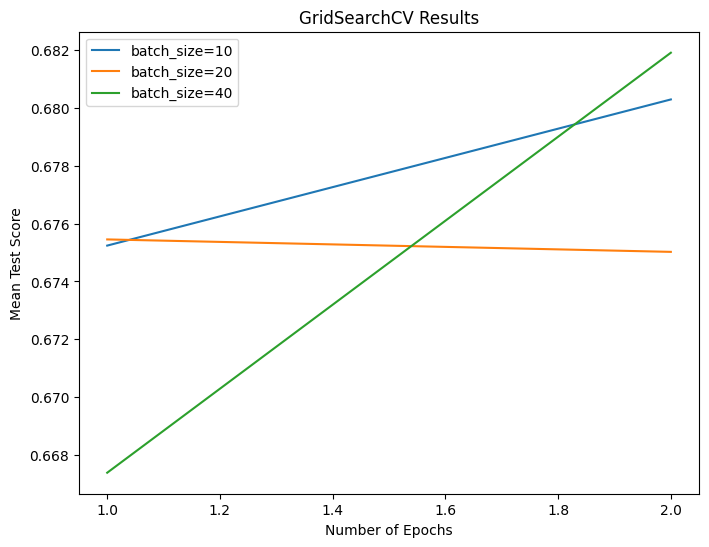

In [16]:
# Plot the results of GridSearchCV
mean_scores = grid_result.cv_results_['mean_test_score']
param_batch_size = grid_result.cv_results_['param_batch_size']
param_epochs = grid_result.cv_results_['param_epochs']

plt.figure(figsize=(8, 6))
for i, batch_size in enumerate(batch_size):
    plt.plot(epochs, mean_scores[i * len(epochs): (i + 1) * len(epochs)], label=f'batch_size={batch_size}')

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Results')
plt.legend()
plt.show()